In [31]:
import pandas as pd
import geopandas as gpd

# Load your data into a GeoDataFrame (if not already)
traffic_data = gpd.read_file('wellington_crash.geojson')  # Example

# Ensure your GeoDataFrame has a geometry column
traffic_data = traffic_data.set_geometry('geometry')

# Assuming 'location_id' is the column that identifies the location of each crash
# If each row is a crash, you can just use the index or a unique identifier

# Group by location and count the crashes
crash_counts = (traffic_data
                .groupby('areaUnitID')  # Replace 'location_id' with your relevant column
                .size()  # Counts the number of rows per group
                .reset_index(name='crash_count'))  # Create a DataFrame with counts

# Merge the crash counts back to the original GeoDataFrame
traffic_data = traffic_data.merge(crash_counts, on='areaUnitID', how='left')

# Now, traffic_data should have a new column 'crash_count'


In [32]:
traffic_data.head()

,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,...,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB,geometry,crash_count
0,66388986,NaN,575300,0.0,0.0,0.0,1.0,1.0,South,2018/2019,...,0.0,0.0,Urban,0.0,0.0,0.0,Light rain,Null,POINT (174.7576 -41.28854),188
1,66388998,NaN,572600,0.0,0.0,0.0,2.0,0.0,North,2017/2018,...,0.0,0.0,Urban,0.0,0.0,0.0,Fine,Null,POINT (174.82511 -41.16802),165
2,66389034,NaN,577000,0.0,NaN,0.0,1.0,NaN,South,2019/2020,...,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null,POINT (174.81144 -41.3266),175
3,66389036,NaN,576800,0.0,NaN,0.0,0.0,NaN,East,2018/2019,...,0.0,0.0,Urban,1.0,NaN,NaN,Light rain,Null,POINT (174.79145 -41.30418),199
4,66389128,NaN,572900,0.0,NaN,0.0,2.0,NaN,Null,2017/2018,...,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null,POINT (174.77253 -41.27599),905


In [33]:
import geopandas as gpd
import libpysal
from esda import Moran

# Load your data (assuming it's already a GeoDataFrame)
# traffic_data = gpd.read_file('your_data_file.geojson')  # Example

# Clean your data: drop rows with NaN values in the crash count column
traffic_data_clean = traffic_data.dropna(subset=['crash_count'])

# Create a spatial weights matrix (e.g., k-nearest neighbors)
w = libpysal.weights.KNN.from_dataframe(traffic_data_clean, k=5)

# Calculate Moran's I for crash counts
moran_crash = Moran(traffic_data_clean['crash_count'], w)

# Output results
print("Moran's I for Crash Counts:", moran_crash.I)
print("p-value:", moran_crash.p_sim)


/opt/miniconda/lib/python3.11/site-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 39 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


Moran's I for Crash Counts: 0.9785807552733939
p-value: 0.001


In [34]:
area_data = gpd.read_file('area-unit-2017-generalised-version.gpkg') 

In [35]:
area_data.head()

,AU2017,AU2017_NAME,AREA_SQ_KM,LAND_AREA_SQ_KM,Shape_Length,geometry
0,564530,Pinehaven,5.925355,5.925355,11518.711535,"MULTIPOLYGON (((1771184.049 5439882.886, 17711..."
1,565400,Pencarrow,241.289721,241.289721,100296.111342,"MULTIPOLYGON (((1767602.914 5435504.219, 17676..."
2,565601,Pauatahanui,67.648175,67.648175,49097.974618,"MULTIPOLYGON (((1767212.058 5448500.806, 17673..."
3,565604,Adventure,3.939647,3.939647,12401.218419,"MULTIPOLYGON (((1759050.961 5446770.197, 17590..."
4,567100,Upper Hutt Central,0.432936,0.432936,2966.769375,"MULTIPOLYGON (((1773956.084 5445712.878, 17739..."


In [36]:
print("Traffic Data Columns:", traffic_data.columns)
print("Area Data Columns:", area_data.columns)


Traffic Data Columns: Index(['OBJECTID', 'advisorySpeed', 'areaUnitID', 'bicycle', 'bridge', 'bus',
       'carStationWagon', 'cliffBank', 'crashDirectionDescription',
       'crashFinancialYear', 'crashLocation1', 'crashLocation2',
       'crashRoadSideRoad', 'crashSeverity', 'crashSHDescription', 'crashYear',
       'debris', 'directionRoleDescription', 'ditch', 'fatalCount', 'fence',
       'flatHill', 'guardRail', 'holiday', 'houseOrBuilding', 'intersection',
       'kerb', 'light', 'meshblockId', 'minorInjuryCount', 'moped',
       'motorcycle', 'NumberOfLanes', 'objectThrownOrDropped', 'otherObject',
       'otherVehicleType', 'overBank', 'parkedVehicle', 'pedestrian',
       'phoneBoxEtc', 'postOrPole', 'region', 'roadCharacter', 'roadLane',
       'roadSurface', 'roadworks', 'schoolBus', 'seriousInjuryCount',
       'slipOrFlood', 'speedLimit', 'strayAnimal', 'streetLight', 'suv',
       'taxi', 'temporarySpeedLimit', 'tlaId', 'tlaName', 'trafficControl',
       'trafficIsland'

In [38]:
print(traffic_data['areaUnitID'].dtype)
print(area_data['AU2017'].dtype)


int32
object


In [39]:
traffic_data['areaUnitID'] = traffic_data['areaUnitID'].astype(str)


In [41]:
import geopandas as gpd

# Assuming area_data and traffic_data are already loaded as GeoDataFrames

# Perform the join
merged_data = traffic_data.merge(area_data, left_on='areaUnitID', right_on='AU2017', how='left')

# Check the result
merged_data.head()


,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,...,weatherA,weatherB,geometry_x,crash_count,AU2017,AU2017_NAME,AREA_SQ_KM,LAND_AREA_SQ_KM,Shape_Length,geometry_y
0,66388986,NaN,575300,0.0,0.0,0.0,1.0,1.0,South,2018/2019,...,Light rain,Null,POINT (174.7576 -41.28854),188,575300,Kelburn,1.236521,1.236521,6305.352941,"MULTIPOLYGON (((1748101.315 5428630.479, 17482..."
1,66388998,NaN,572600,0.0,0.0,0.0,2.0,0.0,North,2017/2018,...,Fine,Null,POINT (174.82511 -41.16802),165,572600,Tawa Central,2.636921,2.636921,8130.989993,"MULTIPOLYGON (((1752869.529 5441694.902, 17528..."
2,66389034,NaN,577000,0.0,NaN,0.0,1.0,NaN,South,2019/2020,...,Fine,Null,POINT (174.81144 -41.3266),175,577000,Lyall Bay-Airport-Moa Point,2.579041,2.579041,16030.982141,"MULTIPOLYGON (((1751437.292 5424347.888, 17514..."
3,66389036,NaN,576800,0.0,NaN,0.0,0.0,NaN,East,2018/2019,...,Light rain,Null,POINT (174.79145 -41.30418),199,576800,Hataitai North,1.294674,1.294674,6093.840125,"MULTIPOLYGON (((1750746.389 5426784.822, 17507..."
4,66389128,NaN,572900,0.0,NaN,0.0,2.0,NaN,Null,2017/2018,...,Fine,Null,POINT (174.77253 -41.27599),905,572900,Thorndon-Tinakori Road,2.807494,2.807494,10159.557877,"MULTIPOLYGON (((1749756.715 5430499.618, 17498..."


/tmp/ipykernel_4084207/1340482388.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['crash_count'].fillna(0, inplace=True)


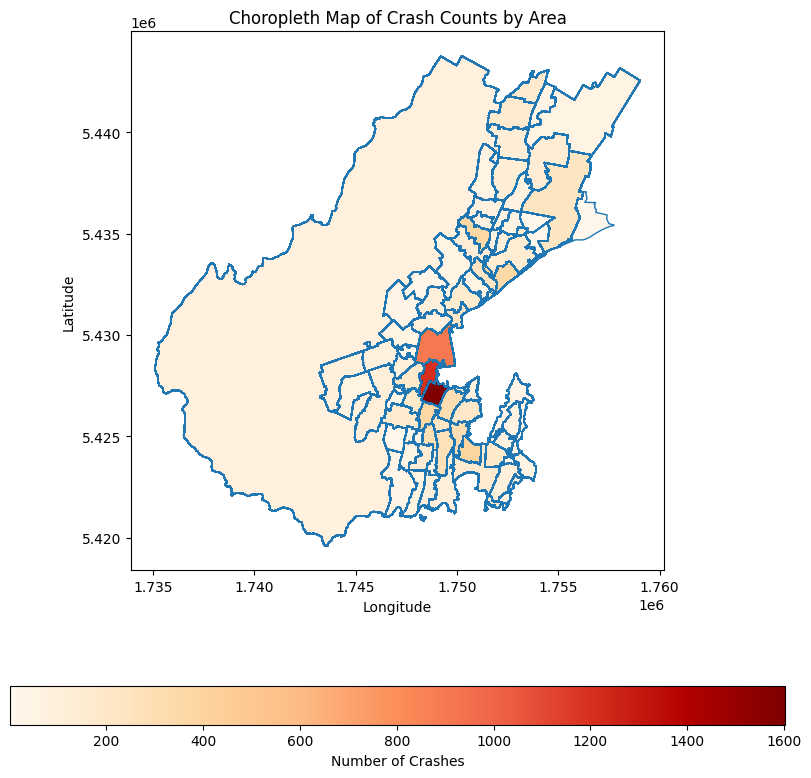

In [43]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Set the active geometry column, assuming 'geometry_y' is the one you want
merged_data = merged_data.set_geometry('geometry_y')

# Fill NaN values in crash_count with 0 for visualization
merged_data['crash_count'].fillna(0, inplace=True)

# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_data.boundary.plot(ax=ax, linewidth=1)  # Optional: Add boundaries for clarity
merged_data.plot(column='crash_count', ax=ax, legend=True,
                 cmap='OrRd',  # Choose a color map
                 legend_kwds={'label': "Number of Crashes",
                              'orientation': "horizontal"})

# Set title and show plot
plt.title('Choropleth Map of Crash Counts by Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


/tmp/ipykernel_4084207/1456181110.py:9: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  weights = libpysal.weights.Queen.from_dataframe(merged_data)


Global Moran's I: 0.6877905531743169
Expected Moran's I: -8.136696501220504e-05
p-value: 0.001


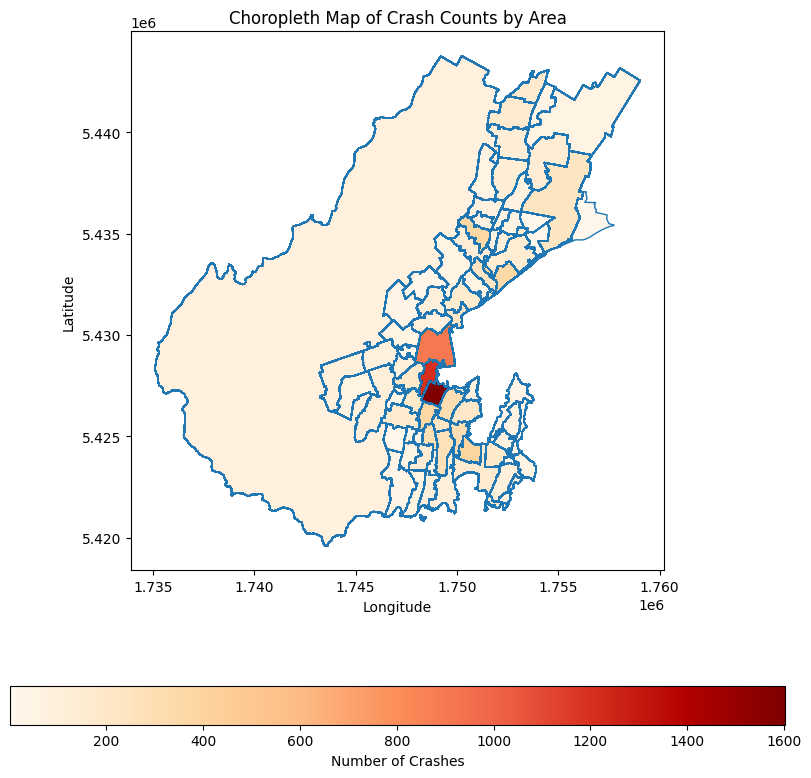

In [47]:
import geopandas as gpd
import libpysal
from esda import Moran
import matplotlib.pyplot as plt

# Assuming 'merged_data' is your GeoDataFrame with the 'crash_count' column

# Create spatial weights matrix (using Queen's contiguity)
weights = libpysal.weights.Queen.from_dataframe(merged_data)

# Normalize weights
weights.transform = 'r'

# Calculate global Moran's I
moran = Moran(merged_data['crash_count'], weights)

print(f"Global Moran's I: {moran.I}")
print(f"Expected Moran's I: {moran.EI}")
print(f"p-value: {moran.p_sim}")

# If Local_Moran is not available, consider alternative analysis or check for package updates
# You may want to perform a different analysis or visualize global Moran's I

# Visualizing global Moran's I (for demonstration)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_data.boundary.plot(ax=ax, linewidth=1)
merged_data.plot(column='crash_count', ax=ax, legend=True,
                 cmap='OrRd', legend_kwds={'label': "Number of Crashes",
                                            'orientation': "horizontal"})
plt.title('Choropleth Map of Crash Counts by Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [48]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from libpysal import weights
from esda import Moran_Local


In [49]:
# Assuming traffic_data is a GeoDataFrame with a 'geometry' column and a column for crash counts, e.g., 'crash_count'
traffic_data['crash_count'] = traffic_data['crash_count'].fillna(0)  # Replace NaNs with 0 if necessary


In [50]:
# Create spatial weights using Queen contiguity
w = weights.Queen.from_dataframe(traffic_data)

# Normalize the weights
w.transform = 'r'


/tmp/ipykernel_4084207/1087736804.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(traffic_data)


In [56]:
# Calculate Local Moran's I
local_moran = Moran_Local(traffic_data['crash_count'], w)



In [57]:
# Extract the local Moran's I values and p-values
traffic_data['I'] = local_moran.Is
traffic_data['p_value'] = local_moran.p_sim
traffic_data['sig'] = np.where(traffic_data['p_value'] < 0.05, 'Significant', 'Not Significant')


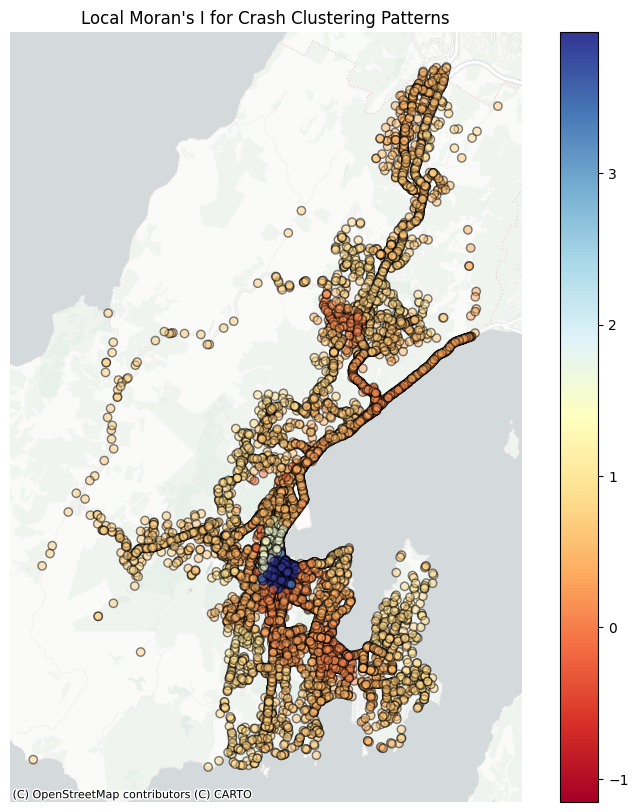

In [71]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Create a new figure
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the GeoDataFrame without boundaries
traffic_data.plot(column='I', ax=ax, legend=True, 
                  cmap='RdYlBu', edgecolor='black', alpha=0.5)

# Add the basemap
ctx.add_basemap(
    ax,  # Pass the axis to the basemap
    crs=traffic_data.crs.to_string(),  # Use the traffic data's CRS
    source=ctx.providers.CartoDB.PositronNoLabels
)

# Add title and labels
plt.title("Local Moran's I for Crash Clustering Patterns")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Remove axes for better visualization
ax.set_axis_off()

# Show the plot
plt.show()


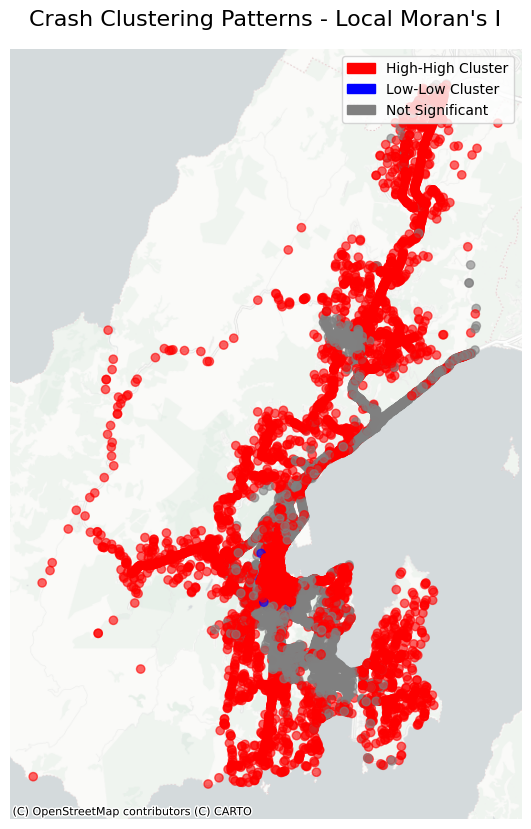

In [69]:
import geopandas as gpd
import matplotlib.pyplot as plt
from esda import Moran_Local
from libpysal import weights
import contextily as ctx

# Ensure the traffic data is in EPSG:3857
traffic_data = traffic_data.to_crs(epsg=3857)

# Create a spatial weights matrix
w = weights.Queen.from_dataframe(traffic_data, use_index=True)

# Calculate Local Moran's I using the Moran_Local class
moran_local = Moran_Local(traffic_data['crash_count'], w)

# Add Local Moran's I results to the GeoDataFrame
traffic_data['local_moran'] = moran_local.Is  # Access the local Moran's I values
traffic_data['significance'] = moran_local.p_sim  # p-value for significance

# Initialize cluster_type column
traffic_data['cluster_type'] = 'Not Significant'

# Classify clusters as high-high or low-low based on local Moran's I
traffic_data.loc[traffic_data['significance'] < 0.05, 'cluster_type'] = [
    'high-high' if i > 0 else 'low-low' for i in traffic_data['local_moran'][traffic_data['significance'] < 0.05]
]

# Define colors for clusters
def color_mapping(significance, cluster_type):
    if significance < 0.05:  # Significant
        if cluster_type == 'high-high':
            return 'red'
        elif cluster_type == 'low-low':
            return 'blue'
    return 'grey'  # Non-significant

# Apply color mapping to your data
traffic_data['color'] = traffic_data.apply(
    lambda row: color_mapping(row['significance'], row['cluster_type']),
    axis=1
)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the GeoDataFrame with colors
traffic_data.plot(ax=ax, color=traffic_data['color'], alpha=0.6)

# Add the basemap
ctx.add_basemap(
    ax,  # Pass the axis to the basemap
    crs=traffic_data.crs.to_string(),  # Use the traffic data's CRS
    source=ctx.providers.CartoDB.PositronNoLabels
)

# Remove axes for better visualization
ax.set_axis_off()

# Add a title
plt.title("Crash Clustering Patterns - Local Moran's I", fontsize=16)

# Create a custom legend
import matplotlib.patches as mpatches

legend_elements = [
    mpatches.Patch(color='red', label='High-High Cluster'),
    mpatches.Patch(color='blue', label='Low-Low Cluster'),
    mpatches.Patch(color='grey', label='Not Significant'),
]

ax.legend(handles=legend_elements, loc='upper right')

plt.show()


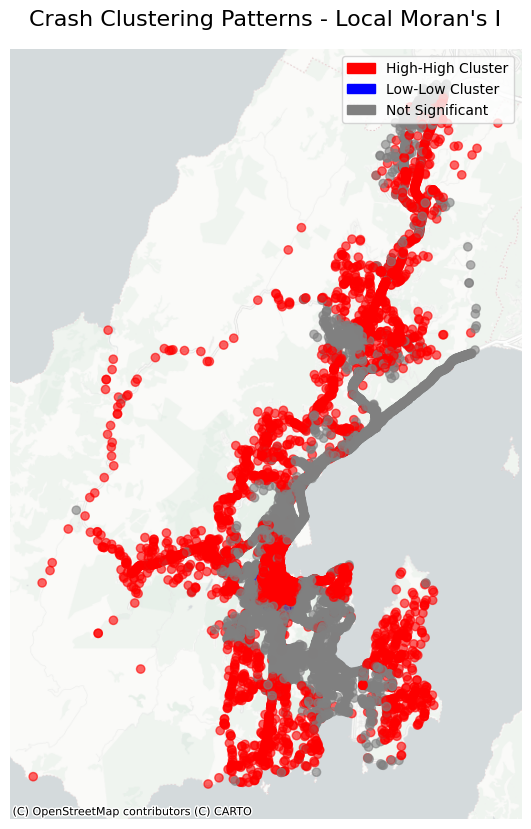

In [74]:
import geopandas as gpd
import matplotlib.pyplot as plt
from esda import Moran_Local
from libpysal import weights
import contextily as ctx

# Ensure the traffic data is in EPSG:3857
traffic_data = traffic_data.to_crs(epsg=3857)

# Create a spatial weights matrix
w = weights.Queen.from_dataframe(traffic_data, use_index=True)

# Calculate Local Moran's I using the Moran_Local class
moran_local = Moran_Local(traffic_data['crash_count'], w)

# Add Local Moran's I results to the GeoDataFrame
traffic_data['local_moran'] = moran_local.Is  # Access the local Moran's I values
traffic_data['significance'] = moran_local.p_sim  # p-value for significance

# Initialize cluster_type column
traffic_data['cluster_type'] = 'Not Significant'

# Classify clusters as high-high or low-low based on Local Moran's I
threshold = 0.01  # Change this value to adjust the significance threshold
traffic_data.loc[traffic_data['significance'] < threshold, 'cluster_type'] = [
    'high-high' if i > 0 else 'low-low' for i in traffic_data['local_moran'][traffic_data['significance'] < threshold]
]

# Define colors for clusters
def color_mapping(significance, cluster_type):
    if significance < 0.01:  # Significant
        if cluster_type == 'high-high':
            return 'red'
        elif cluster_type == 'low-low':
            return 'blue'
    return 'grey'  # Non-significant

# Apply color mapping to your data
traffic_data['color'] = traffic_data.apply(
    lambda row: color_mapping(row['significance'], row['cluster_type']),
    axis=1
)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the GeoDataFrame with colors
traffic_data.plot(ax=ax, color=traffic_data['color'], alpha=0.6)

# Add the basemap
ctx.add_basemap(
    ax,  # Pass the axis to the basemap
    crs=traffic_data.crs.to_string(),  # Use the traffic data's CRS
    source=ctx.providers.CartoDB.PositronNoLabels
)

# Remove axes for better visualization
ax.set_axis_off()

# Add a title
plt.title("Crash Clustering Patterns - Local Moran's I", fontsize=16)

# Create a custom legend
import matplotlib.patches as mpatches

legend_elements = [
    mpatches.Patch(color='red', label='High-High Cluster'),
    mpatches.Patch(color='blue', label='Low-Low Cluster'),
    mpatches.Patch(color='grey', label='Not Significant'),
]

ax.legend(handles=legend_elements, loc='upper right')

plt.show()
